In [56]:
#!/usr/bin/env python
# coding: utf-8

# Data manipulation
from dotenv import load_dotenv
from IPython.display import display, HTML
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Preferences
pd.options.display.max_columns = None

# Read in the data we want
time_allocation_df = pd.read_csv("../../Data/df_numeric_for_clustering.csv").drop(columns=['Unnamed: 0'], axis=1)
time_allocation_df = time_allocation_df.drop(['CR ALL', 'Academia', 'CR w/o Job', 'Post Doc', 'Job', 'Clinical Job'], axis=1)
date_col = time_allocation_df['date_column']
time_allocation_df = time_allocation_df.drop(columns=['date_column'], axis=1)

# Normalize all cols within itself
time_allocation_df = (time_allocation_df -time_allocation_df.min()) / (time_allocation_df.max() - time_allocation_df.min())
time_allocation_df['date_column'] = date_col
time_allocation_df['day_of_week'] = pd.to_datetime(time_allocation_df['date_column'], format='mixed', utc=True).dt.day_name()
time_allocation_df = time_allocation_df.drop(['date_column'], axis=1)
time_allocation_df

,Journal Articles,Philosophy,Reading Books,Learning,Writing,Research Projects,Teaching,Language,Ethics Work,Presentations,Physical Exercise,Human Experience,Coding,Hobbies,Art,Family,EAB,ABA,OBM,EAB Non-Research,ABA Non-Research,Behaviorism,Ethics,Non-BA Experimental,Non-BA Non-Experimental,Economics,Behavioral Economics,Data & Analytics,Computer Science,Behavioral Pharmacology,ovr_pirates,ovr_guardians,ovr_other,season_total,pirates_season,guardians_season,other_season,pirates,guardians,other,distance_ride,distance_run,distance_swim,distance_walk,distance_workout,distance_yoga,elapsedtime_ride,elapsedtime_run,elapsedtime_swim,elapsedtime_walk,elapsedtime_workout,elapsedtime_yoga,day_of_week
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.089854,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,Saturday
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.238460,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,Sunday
2,0.000000,0.000000,0.119341,0.000000,0.000000,0.00000,0.047615,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,Monday
3,0.000000,0.000000,0.041630,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,Tuesday
4,0.013715,0.061538,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71124,0.011929,0.000000,0.054893,0.075401,0.100903,0.14184,0.000000,0.0,0.0,0.000000,0.137092,0.022278,0.077217,0.140433,0.0,0.108157,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.209064,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265878,0.0,0.000000,0.0,NaN,0.0,0.296296,0.0,0.000000,0.000000,0.000000,Tuesday
71125,0.013366,0.000000,0.069009,0.066155,0.122096,0.00000,0.340204,0.0,0.0,0.000000,0.121594,0.057145,0.079672,0.000000,0.0,0.030375,0.0,0.0,0.0,0.0,0.0,0.058048,0.0,0.0,0.065295,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265864,0.0,0.000000,0.0,NaN,0.0,0.288489,0.0,0.000000,0.081799,0.000000,Wednesday
71126,0.011913,0.000000,0.102130,0.000000,0.094165,0.00000,0.312802,0.0,0.0,0.000000,0.038336,0.069004,0.064797,0.000000,0.0,0.106119,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.117782,0.0,0.0,0.011894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.198095,0.0,NaN,0.0,0.000000,0.0,0.125924,0.074138,0.000000,Thursday
71127,0.000000,0.000000,0.211175,0.060292,0.128614,0.00000,0.000000,0.0,0.0,0.000031,0.106545,0.024451,0.000000,0.000000,0.0,0.142022,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265454,0.0,0.000000,0.0,NaN,0.0,0.284495,0.0,0.000000,0.000000,0.265106,Friday


In [57]:
dim_1_cols = ['season_total', 'pirates_season', 'guardians_season', 
              'other_season', 'ovr_pirates', 'ovr_guardians', 'ovr_other', 
              'pirates', 'guardians', 'other']
dim_2_cols = ['elapsedtime_run', 'distance_run', 'Physical Exercise', 'elapsedtime_yoga']

# Create mask for rows where all dim_1_cols are 0
all_zero_mask_baseball = (time_allocation_df[dim_1_cols] == 0).all(axis=1)
all_zero_mask_exercise = (time_allocation_df[dim_2_cols] == 0).all(axis=1)

# Create the two dataframes
df_all_zero_baseball = time_allocation_df[all_zero_mask_baseball]
df_non_zero_baseball = time_allocation_df[~all_zero_mask_baseball]
df_all_zero_exercise = time_allocation_df[all_zero_mask_exercise]
df_non_zero_exercise = time_allocation_df[~all_zero_mask_exercise]


In [58]:
print(df_all_zero_baseball.shape)
print(df_non_zero_baseball.shape)
print(df_all_zero_exercise.shape)
print(df_non_zero_exercise.shape)

(51523, 53)
(19606, 53)
(33119, 53)
(38010, 53)


In [59]:
def plot_time_allocation_percentages(
        df1, 
        df2, 
        condition1_label, 
        condition2_label, 
        exclude_cols=None, 
        figsize=(18, 6), 
        palette=['gray', 'red']):   
    if exclude_cols:
        df1_pct = df1.drop(exclude_cols, axis=1).div(df1.drop(exclude_cols, axis=1).sum(axis=1), axis=0)
        df2_pct = df2.drop(exclude_cols, axis=1).div(df2.drop(exclude_cols, axis=1).sum(axis=1), axis=0)
    else:
        df1_pct = df1.div(df1.sum(axis=1), axis=0)
        df2_pct = df2.div(df2.sum(axis=1), axis=0)

    # Melt the percentage dataframes and reset index
    plot_df1 = df1_pct.melt(var_name='Feature', value_name='Value').reset_index(drop=True)
    plot_df1['condition'] = condition1_label

    plot_df2 = df2_pct.melt(var_name='Feature', value_name='Value').reset_index(drop=True)
    plot_df2['condition'] = condition2_label

    plot_df = pd.concat([plot_df1, plot_df2], ignore_index=True)

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x='Feature', y='Value', hue='condition', data=plot_df, 
                palette=palette, capsize=0.02, dodge=True)
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.ylabel('Proportional Allocation', fontsize=20, labelpad=12)
    sns.despine(top=True, right=True)
    
    return fig, ax

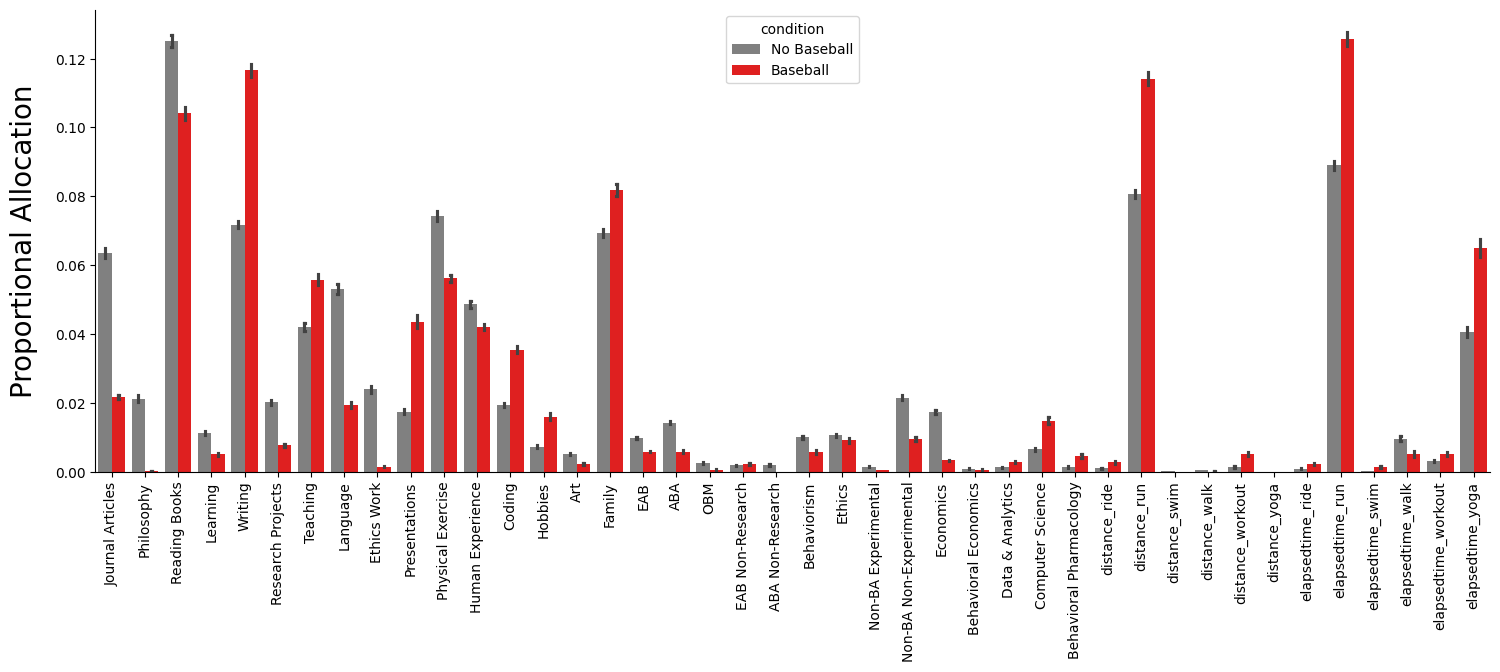

In [60]:
# Using the same data as before
fig, ax = plot_time_allocation_percentages(
    df_all_zero_baseball, 
    df_non_zero_baseball,
    'No Baseball',
    'Baseball',
    exclude_cols=dim_1_cols+['day_of_week']
)
plt.show()

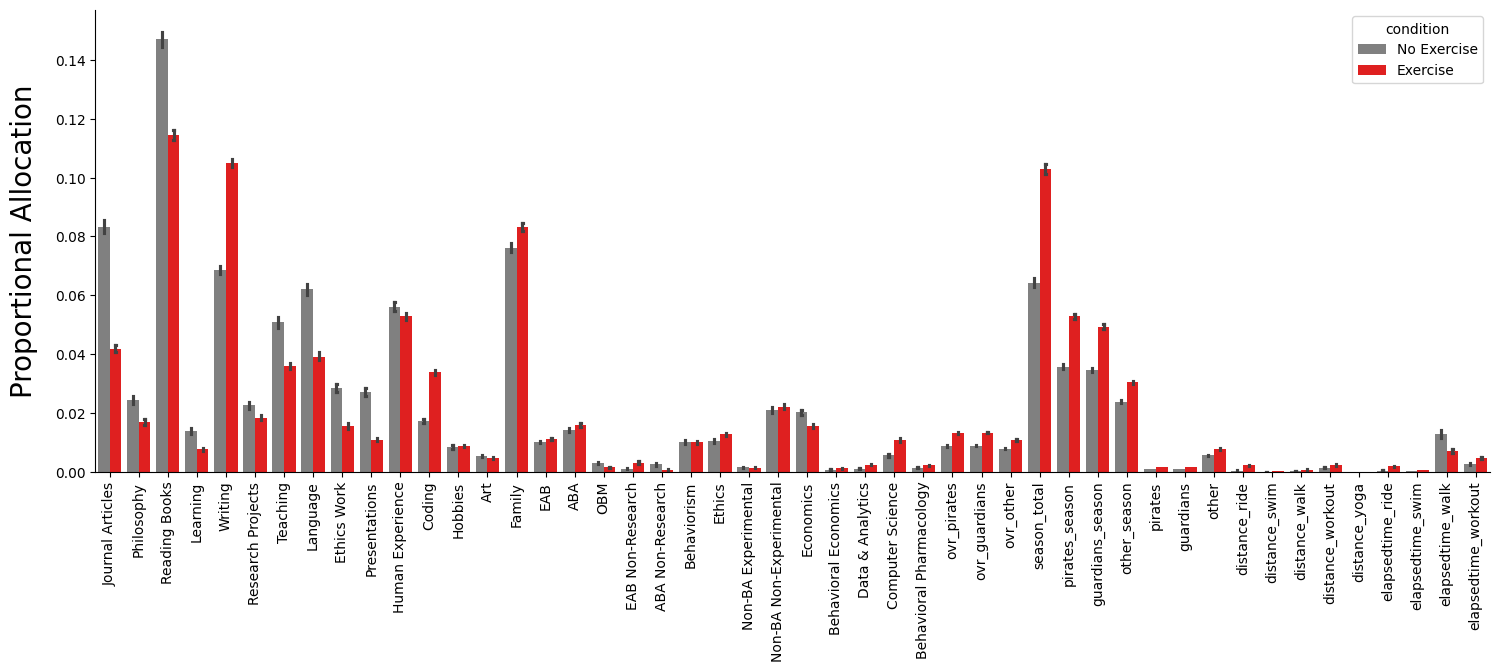

In [62]:
# Using the same data as before
fig, ax = plot_time_allocation_percentages(
    df_all_zero_exercise, 
    df_non_zero_exercise,
    'No Exercise',
    'Exercise',
    exclude_cols=dim_2_cols+['day_of_week']
)
plt.show()

In [84]:
def create_weekly_heatmap(df, title='Exercise Features by Day of Week', figsize=(30, 6), cmap='viridis', exclude_cols=None):
    # Create a copy to avoid modifying the original DataFrame
    df_heatmap = df.copy()
    
    # Ensure day_of_week is in the correct format
    if 'day_of_week' not in df_heatmap.columns:
        raise ValueError("DataFrame must contain a 'day_of_week' column")
    
    # Drop excluded columns if specified
    if exclude_cols:
        df_heatmap = df_heatmap.drop(exclude_cols, axis=1)
    
    # Group by day_of_week and aggregate (mean)
    df_grouped = df_heatmap.groupby('day_of_week').mean().round(2)
    
    # Reorder days
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_grouped = df_grouped.reindex(days_order)
    
    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(df_grouped, annot=True, cmap=cmap)
    plt.title(title, fontsize=30)
    plt.ylabel('Day of Week', fontsize=30, labelpad=12)
    plt.xlabel('')
    plt.show()

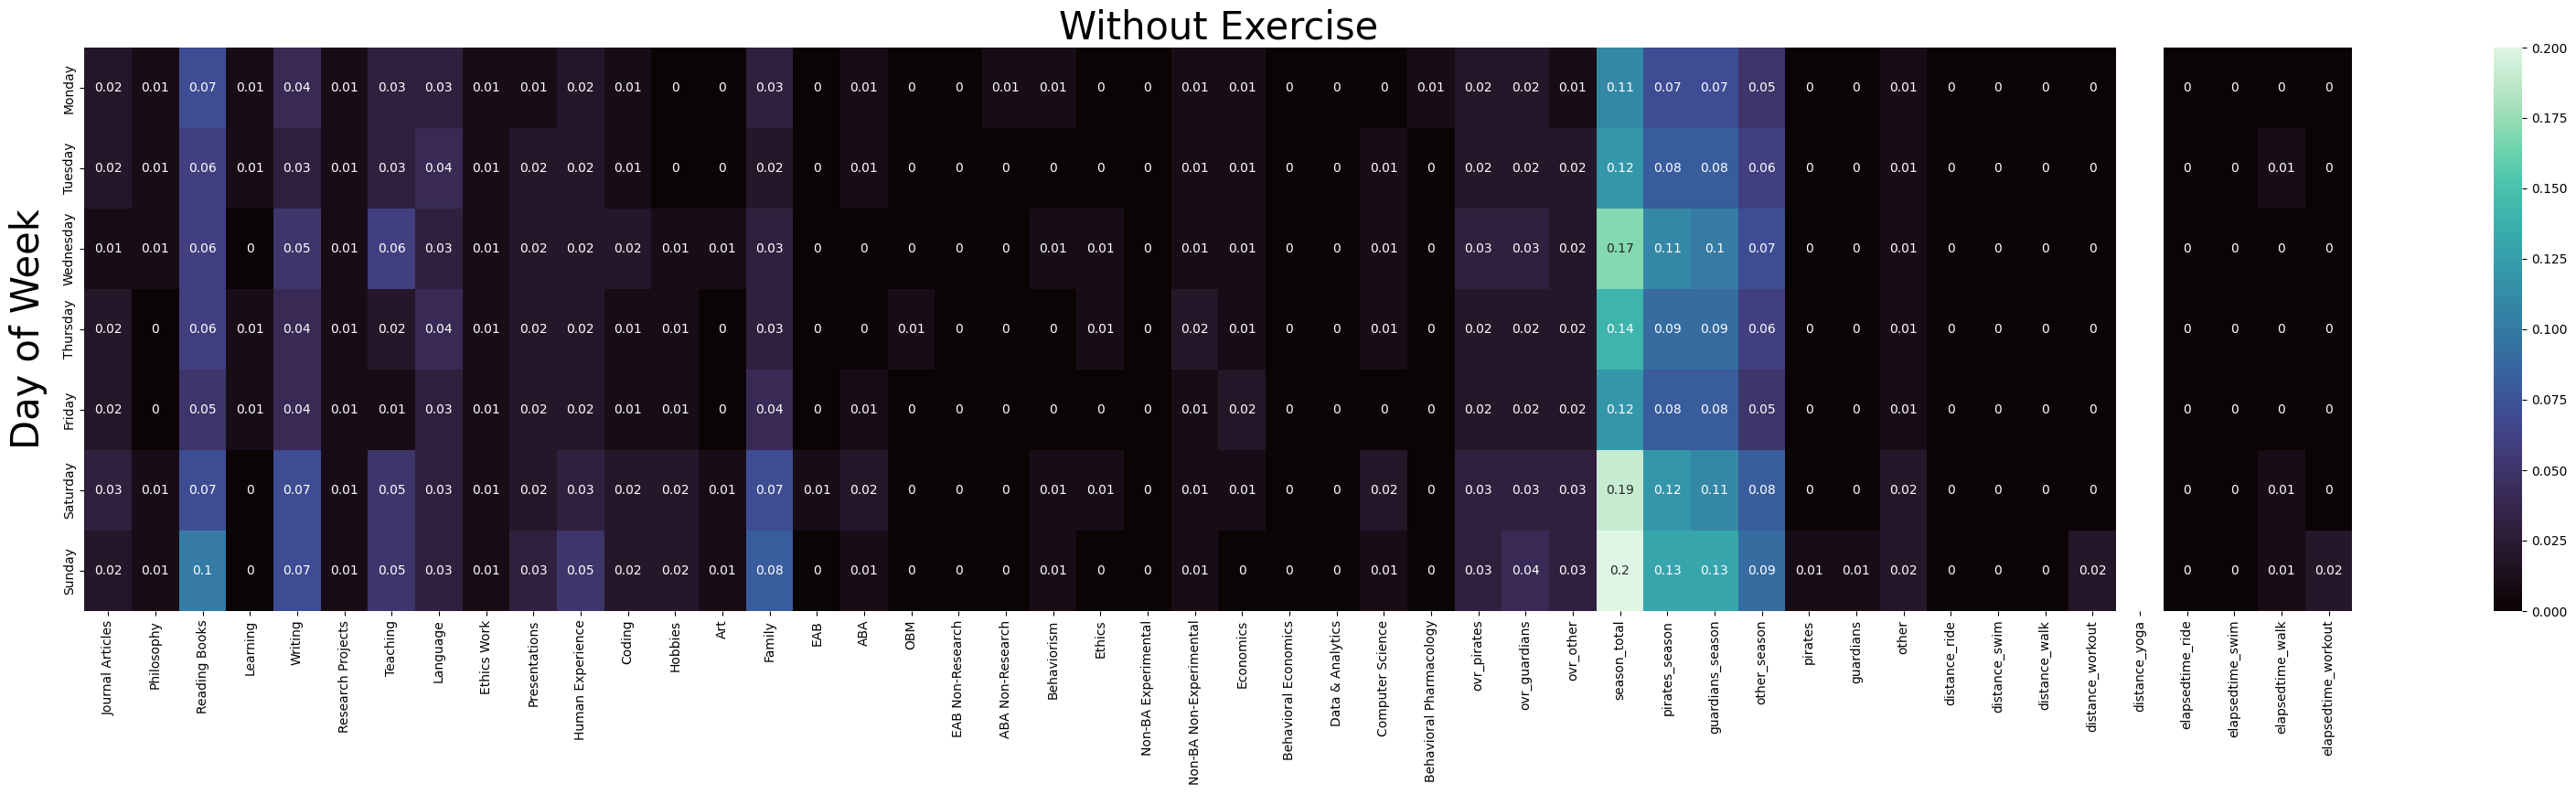

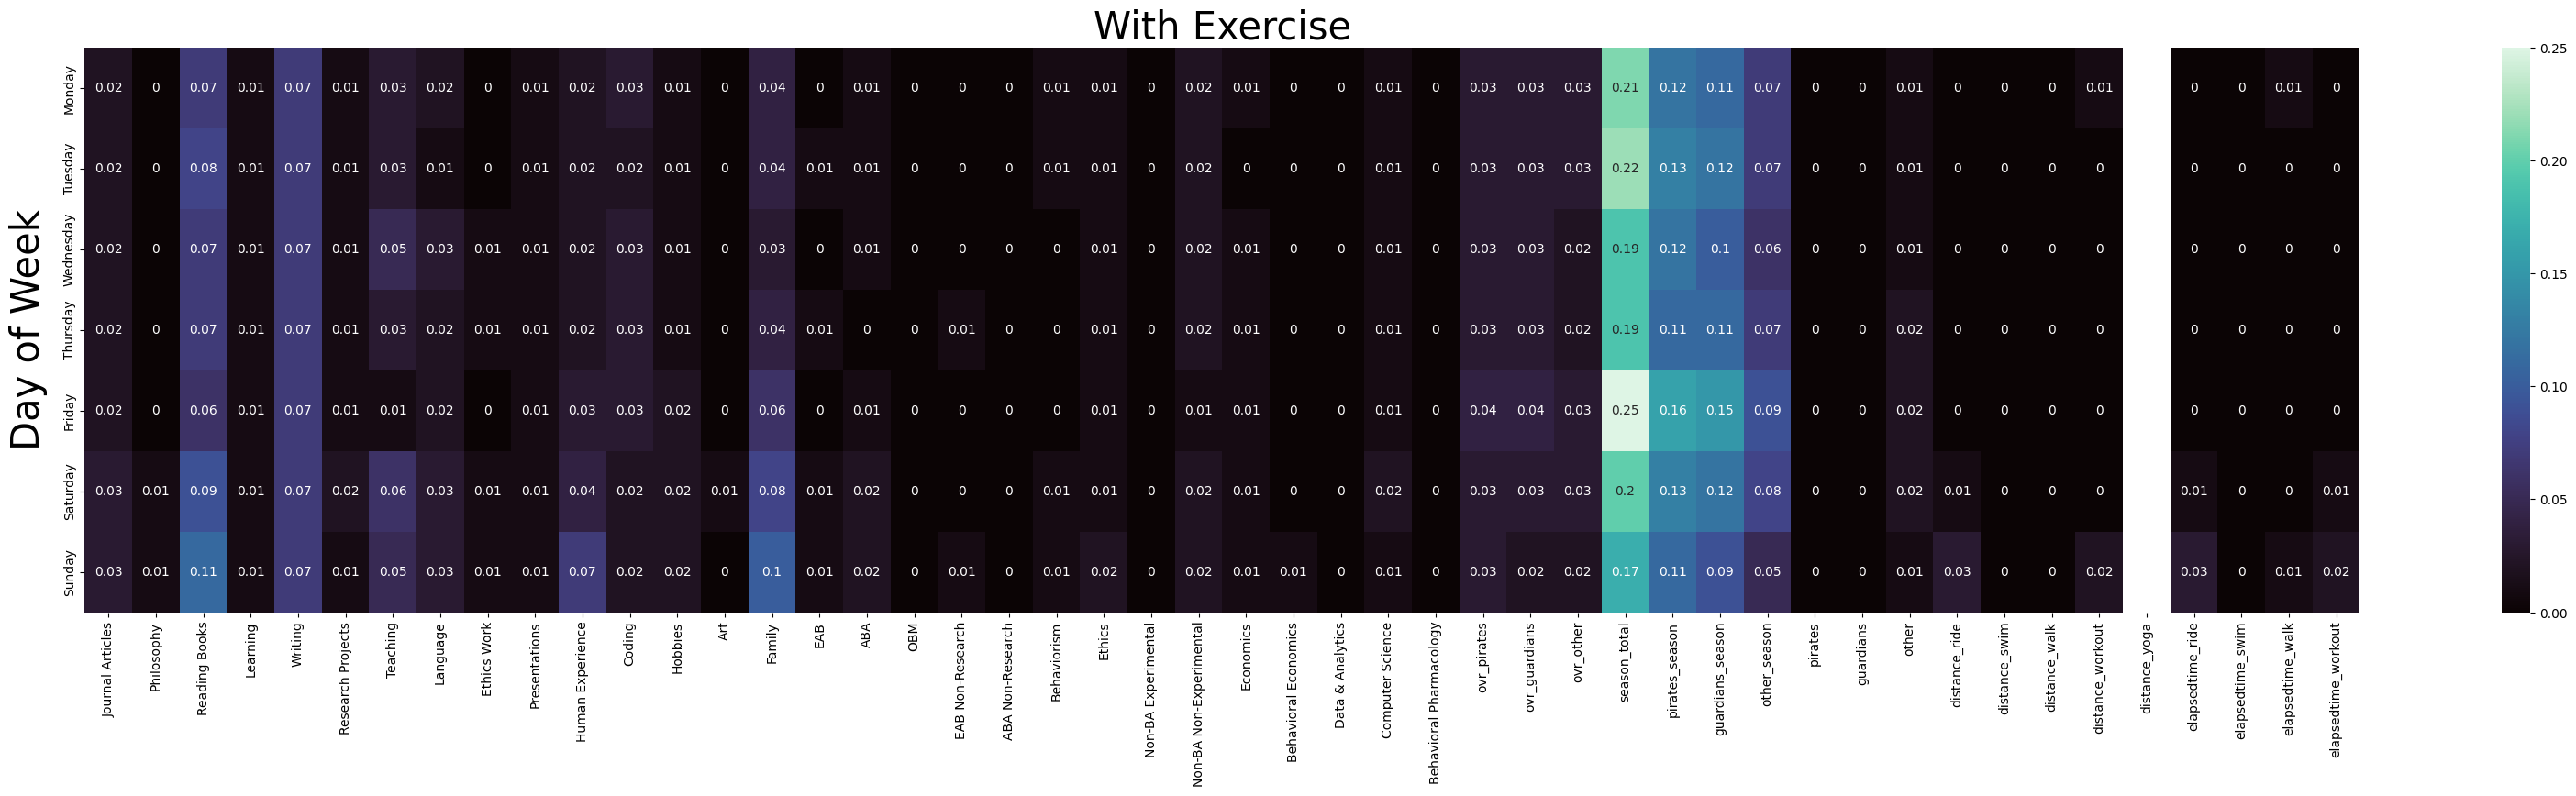

In [86]:
create_weekly_heatmap(df_all_zero_exercise, title='Without Exercise', figsize=(40, 8), exclude_cols=dim_2_cols, cmap='mako')
create_weekly_heatmap(df_non_zero_exercise, title='With Exercise', figsize=(40, 8), exclude_cols=dim_2_cols, cmap='mako')

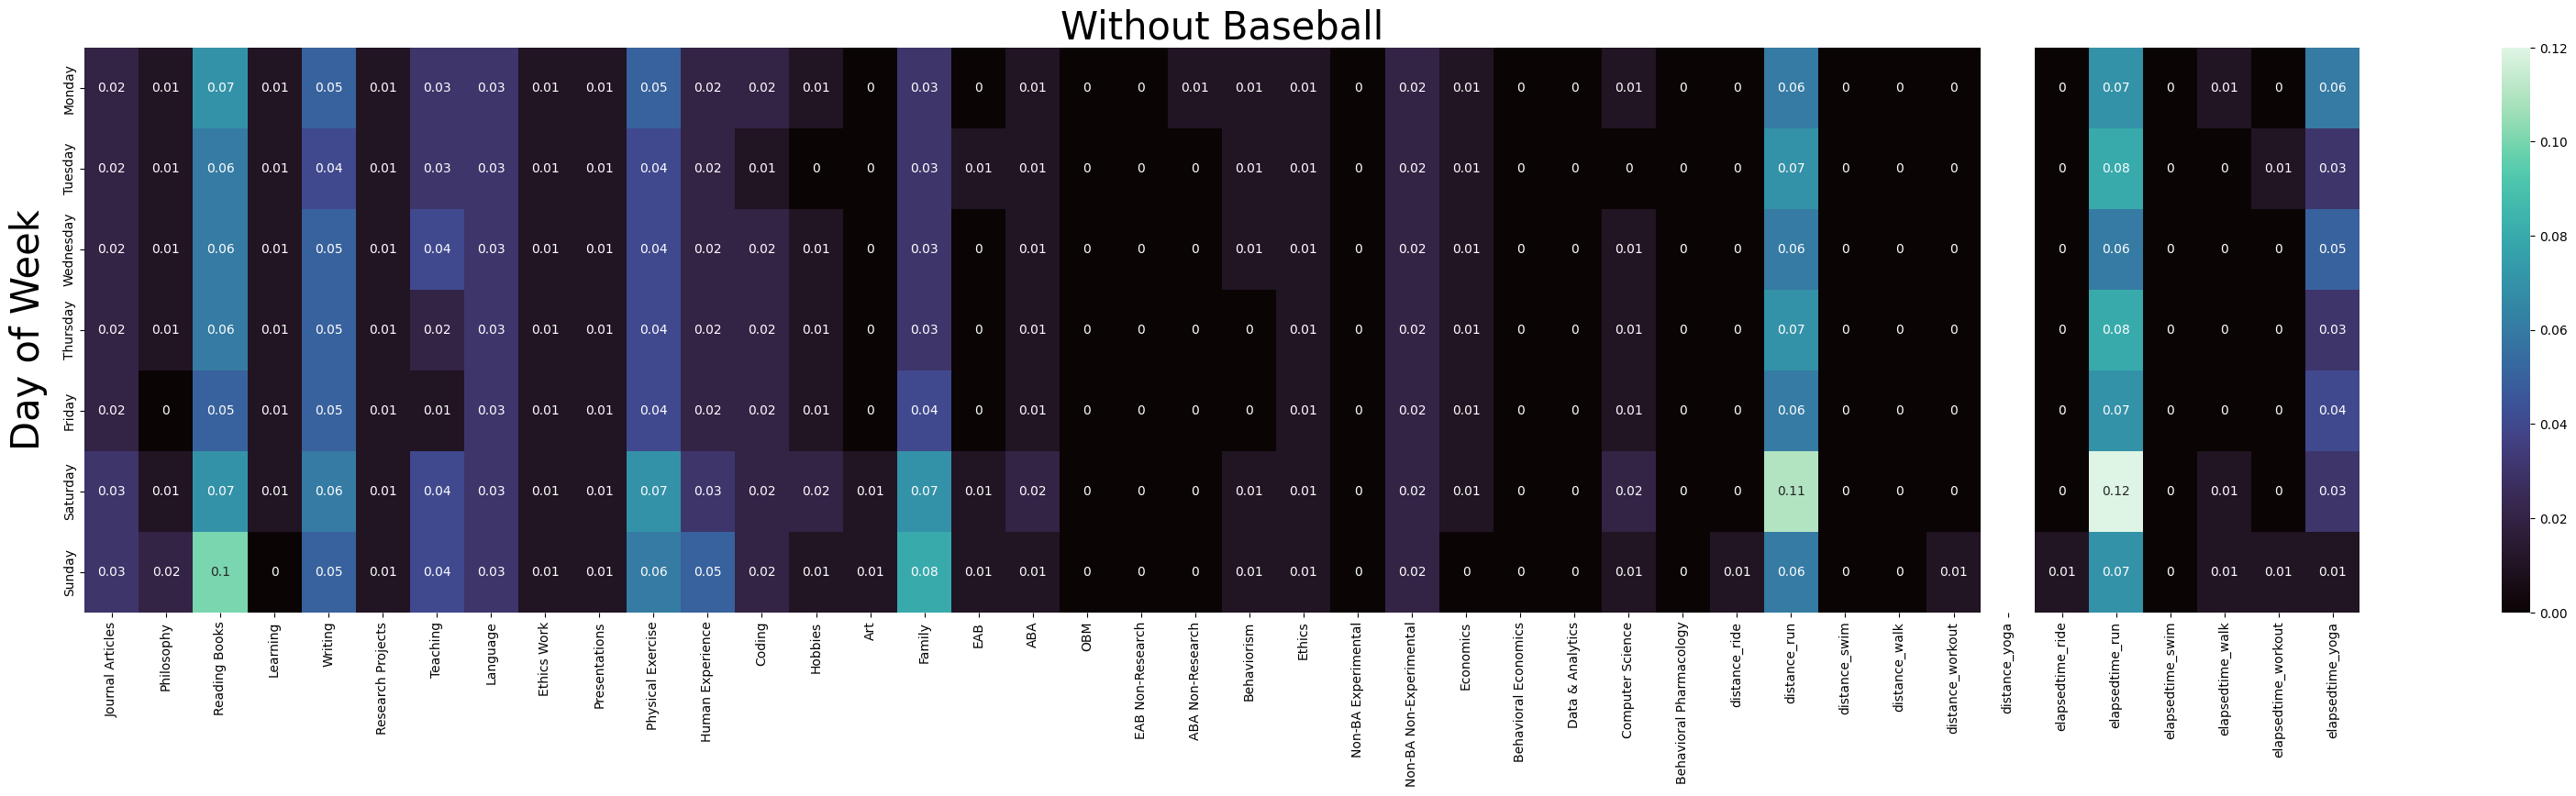

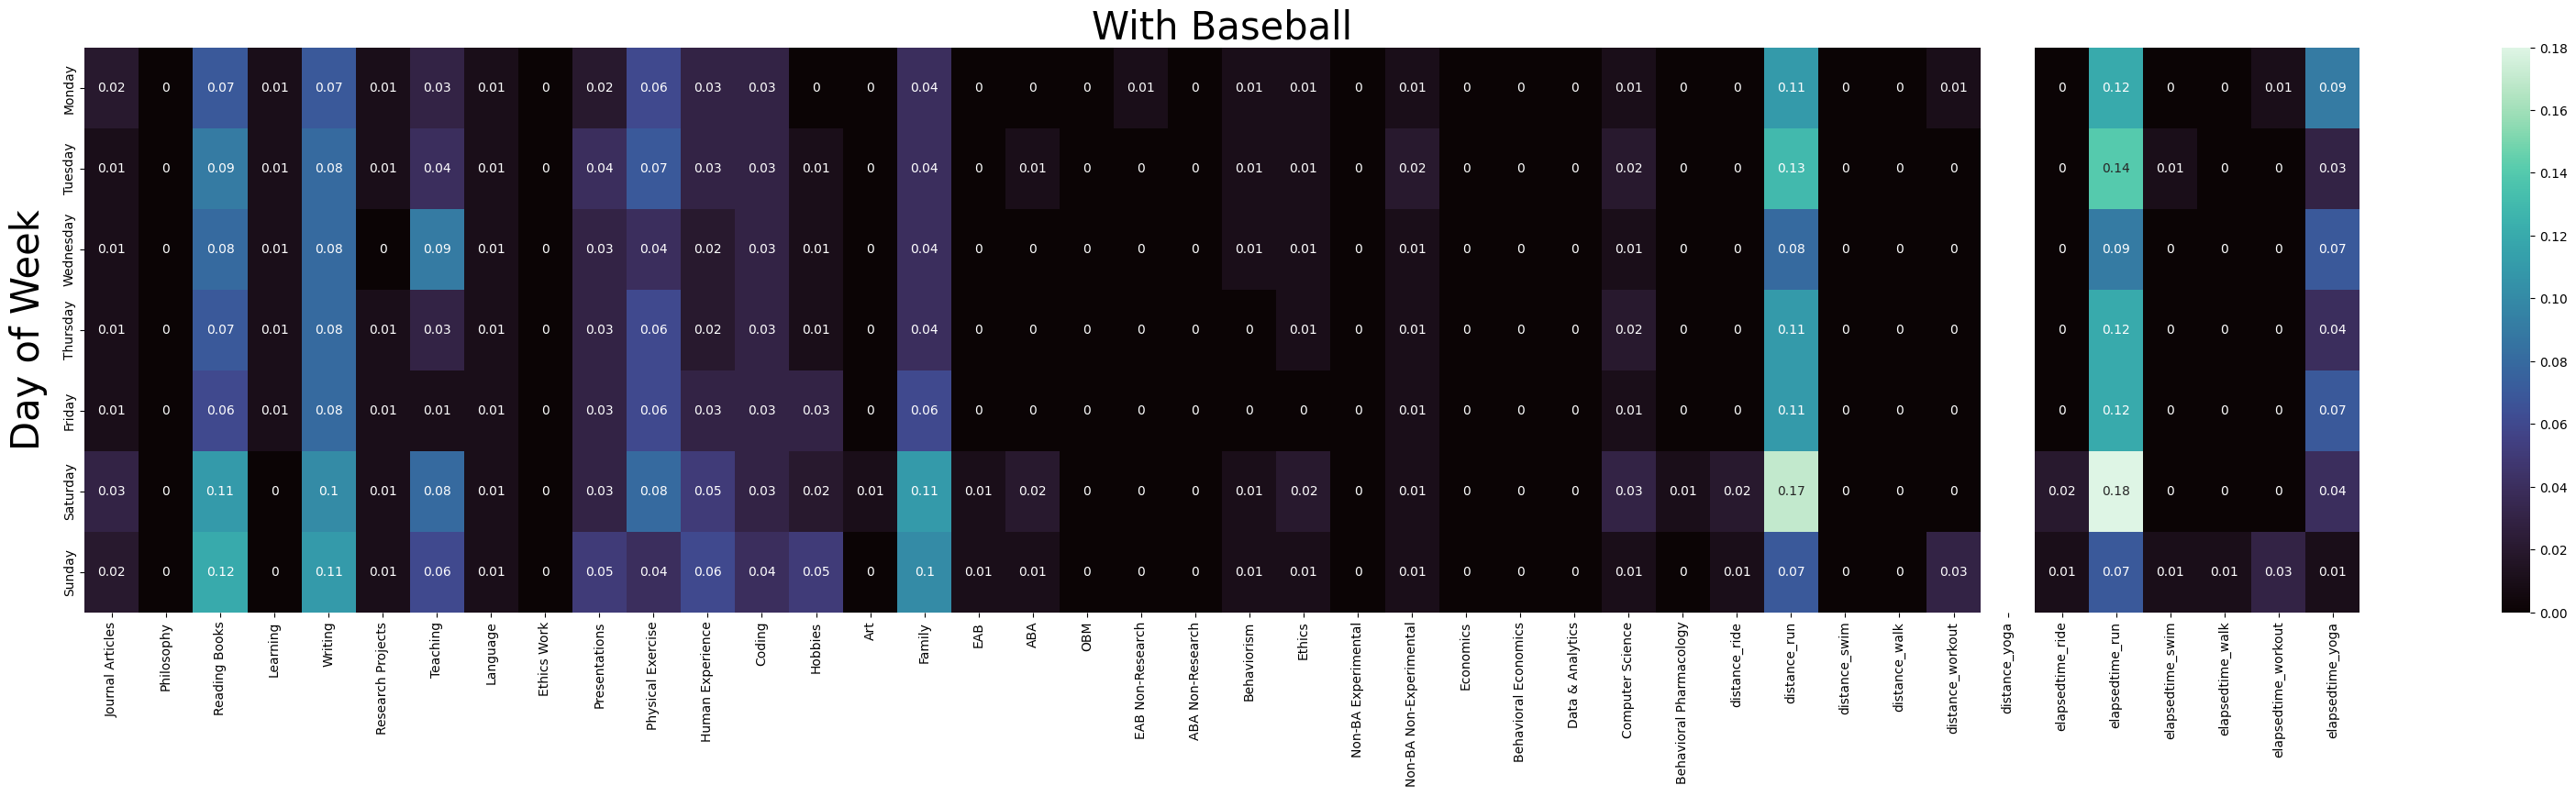

In [87]:
create_weekly_heatmap(df_all_zero_baseball, title='Without Baseball', figsize=(40, 8), exclude_cols=dim_1_cols, cmap='mako')
create_weekly_heatmap(df_non_zero_baseball, title='With Baseball', figsize=(40, 8), exclude_cols=dim_1_cols, cmap='mako')